SOLUTION OF PART 1

- CONVERTIR NB A MARKDOWN
- HACER MAKE LINT
- REVISAR CONSEJOS PR 1

TAKE INTO ACCOUNT:
- DATA DOWNLOADED THROUGH WSL WITH AWS CLI

In [1]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# parquet files to df

df_abandoned_carts = pd.read_parquet('../../data/sampled_datasets/abandoned_carts.parquet', engine='pyarrow')
df_inventory = pd.read_parquet('../../data/sampled_datasets/inventory.parquet', engine='pyarrow')
df_orders = pd.read_parquet('../../data/sampled_datasets/orders.parquet', engine='pyarrow')
df_regulars = pd.read_parquet('../../data/sampled_datasets/regulars.parquet', engine='pyarrow')
df_users = pd.read_parquet('../../data/sampled_datasets/users.parquet', engine='pyarrow')

In [3]:
# info about abandoned carts

print ('Shape: ', df_abandoned_carts.shape)
print ('Size: ', df_abandoned_carts.size)

df_abandoned_carts.info()
df_abandoned_carts.head()

Shape:  (5457, 4)
Size:  21828
<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB


,id,user_id,created_at,variant_id
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,"[33826459287684, 33826457616516, 3366719212762..."
13,20352449839236,9d6187545c005d39e44d0456d87790db18611d7c7379bd...,2021-06-27 05:24:13,"[34415988179076, 34037940158596, 3450282236326..."
45,20478401413252,e83fb0273d70c37a2968fee107113698fd4f389c442c0b...,2021-07-18 08:23:49,"[34543001337988, 34037939372164, 3411360609088..."
50,20481783103620,10c42e10e530284b7c7c50f3a23a98726d5747b8128084...,2021-07-18 21:29:36,"[33667268116612, 34037940224132, 3443605520397..."
52,20485321687172,d9989439524b3f6fc4f41686d043f315fb408b954d6153...,2021-07-19 12:17:05,"[33667268083844, 34284950454404, 33973246886020]"


In [ ]:
# info about inventory

print ('Shape: ', df_inventory.shape)
print ('Size: ', df_inventory.size)

df_inventory.info()
df_inventory.head()

Shape:  (1733, 6)
Size:  10398
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]


In [5]:
# info about orders

print ('Shape: ', df_orders.shape)
print ('Size: ', df_orders.size)

df_orders.info()
df_orders.head()

Shape:  (8773, 6)
Size:  52638
<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB


,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."


In [6]:
# info about regulars

print ('Shape: ', df_regulars.shape)
print ('Size: ', df_regulars.size)

df_regulars.info()
df_regulars.head()

Shape:  (18105, 3)
Size:  54315
<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB


,user_id,variant_id,created_at
3,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03
11,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35
18,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03
46,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35
47,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11


In [7]:
# info about users

print ('Shape: ', df_users.shape)
print ('Size: ', df_users.size)

df_users.info()
df_users.head()

Shape:  (4983, 10)
Size:  49830
<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB


,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
2160,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1123,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1958,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN
675,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4694,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN


Want to know:

- Who are my customers
- Products that are together in someone's regular list
- Are there any months with less or more orders / abandoned carts?

1. Who are the customers

In [8]:
## Add n_regulars to users

df_reg_counts = df_regulars.groupby('user_id').size().reset_index(name='num_favs')

df_users = pd.merge(df_users, df_reg_counts, on='user_id', how='left')
df_users['num_favs'].fillna(0, inplace=True) # to fill by 0 those without any regulars

df_users.dropna().head()

/tmp/ipykernel_16447/1283221679.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_users['num_favs'].fillna(0, inplace=True) # to fill by 0 those without any regulars


,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,num_favs
23,09d70e0b0778117aec5550c08032d56f8e06f992741680...,Proposition,UKI,2021-06-28 12:07:04,2021-06-01 00:00:00,1.0,1.0,0.0,0.0,0.0,0.0
27,4f5ff38ce5ed48096ba80dff80e167db1ad24b9ebdb00c...,Top Up,UKD,2020-06-12 12:07:35,2020-06-01 00:00:00,3.0,2.0,0.0,1.0,0.0,1.0
28,7b2ae50bb11646436fa613394fc3e71e1a0cdc3ba30cdb...,Proposition,UKF,2020-10-03 09:53:57,2020-10-01 00:00:00,2.0,2.0,0.0,0.0,2.0,25.0
35,5e977a4aa2c57f306b8a22f92eaaa177f7dc31a52df82c...,Proposition,UKI,2021-10-14 10:41:13,2021-10-01 00:00:00,2.0,1.0,1.0,0.0,1.0,72.0
66,eafb89ad33eb377adb98a915b6a5a65f1284c2db517d07...,Proposition,UKH,2022-01-20 15:53:09,2022-01-01 00:00:00,2.0,2.0,0.0,0.0,0.0,3.0


In [9]:
df_users.describe()

,count_people,count_adults,count_children,count_babies,count_pets,num_favs
count,325.000000,325.000000,325.000000,325.000000,325.000000,4983.000000
mean,2.787692,2.003077,0.707692,0.076923,0.636923,3.633353
std,1.365753,0.869577,1.026246,0.289086,0.995603,20.320530
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.000000,1.000000,0.000000,1.000000,1.000000
max,8.000000,7.000000,6.000000,2.000000,6.000000,726.000000


In [10]:
# How geographically distributed are the users?

geo_values = df_users['user_nuts1'].unique()
geo_values_n = df_users['user_nuts1'].nunique()

print(geo_values)
print(geo_values_n)

# There are 12 different zones. Let's see how distributed they are
    

['UKH' 'UKJ' 'UKD' 'UKI' 'UKE' 'UKK' 'UKF' 'UKL' 'UKC' 'UKG' 'UKM' None
 'UKN']
12


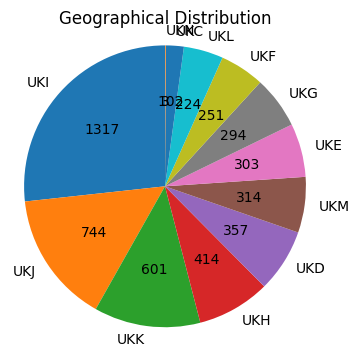

In [11]:
geo_counts = df_users['user_nuts1'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(geo_counts,
    labels=geo_counts.index,
    autopct=lambda p:f'{int(p * sum(geo_counts) / 100)}',
    startangle=90)

plt.axis('equal')
plt. title('Geographical Distribution')

plt.show()

Hay una region muy mayoritaria y otras muy presentes. Quiza se podria sacar informacion acerca del tipo de personas que viven aqui, comportamiento de compra, nivel socioeconomico... se podria crear un 'customer persona'

In [16]:
# lets calculate the mean number of orders per region, to know more about each one

if 'num_orders' not in df_users.columns:
    orders_per_user = df_orders.groupby('user_id').size().reset_index(name='num_orders')
    df_users = pd.merge(df_users, orders_per_user, on='user_id', how='left')
    df_users['num_orders'].fillna(0, inplace=True)
    

df_users.dropna().head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,num_favs,num_orders
23,09d70e0b0778117aec5550c08032d56f8e06f992741680...,Proposition,UKI,2021-06-28 12:07:04,2021-06-01 00:00:00,1.0,1.0,0.0,0.0,0.0,0.0,3
27,4f5ff38ce5ed48096ba80dff80e167db1ad24b9ebdb00c...,Top Up,UKD,2020-06-12 12:07:35,2020-06-01 00:00:00,3.0,2.0,0.0,1.0,0.0,1.0,1
28,7b2ae50bb11646436fa613394fc3e71e1a0cdc3ba30cdb...,Proposition,UKF,2020-10-03 09:53:57,2020-10-01 00:00:00,2.0,2.0,0.0,0.0,2.0,25.0,1
35,5e977a4aa2c57f306b8a22f92eaaa177f7dc31a52df82c...,Proposition,UKI,2021-10-14 10:41:13,2021-10-01 00:00:00,2.0,1.0,1.0,0.0,1.0,72.0,1
66,eafb89ad33eb377adb98a915b6a5a65f1284c2db517d07...,Proposition,UKH,2022-01-20 15:53:09,2022-01-01 00:00:00,2.0,2.0,0.0,0.0,0.0,3.0,1


In [22]:
avg_orders_per_region = df_users.groupby('user_nuts1')['num_orders'].mean().reset_index()
avg_orders_per_region.columns = ['Region', 'Avg orders']

avg_orders_per_region

,Region,Avg orders
0,UKC,2.009804
1,UKD,1.432961
2,UKE,1.541254
3,UKF,1.805556
4,UKG,1.616949
5,UKH,2.077295
6,UKI,1.651745
7,UKJ,1.915436
8,UKK,1.906977
9,UKL,1.705357


Se podria estimar que la region UKN es pobre, porque se tiene que el numero de pedidos medio es uno y el numero de usuarios de esta zona es menor. Sin embargo, habria que calcular el precio medio del pedido y conocer el numero de personas que viven en cada region para poder estimar mejor esta premisa. Tambien hay que saber si el e-commerce que se esta estudiando esta dirigido a todos los publicos o si por el contrario es un supermercado de productos gourmet, eco... eso podria explicar las tendencias de compra de las regiones

2. Is there any 'period' information?

In [27]:
monthly_orders = df_orders.resample('M', on='order_date').size().reset_index(name='num_orders')
monthly_orders['order_date'] = monthly_orders['order_date'].dt.strftime('%Y-%m')

/tmp/ipykernel_16447/1426177753.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = df_orders.resample('M', on='order_date').size().reset_index(name='num_orders')


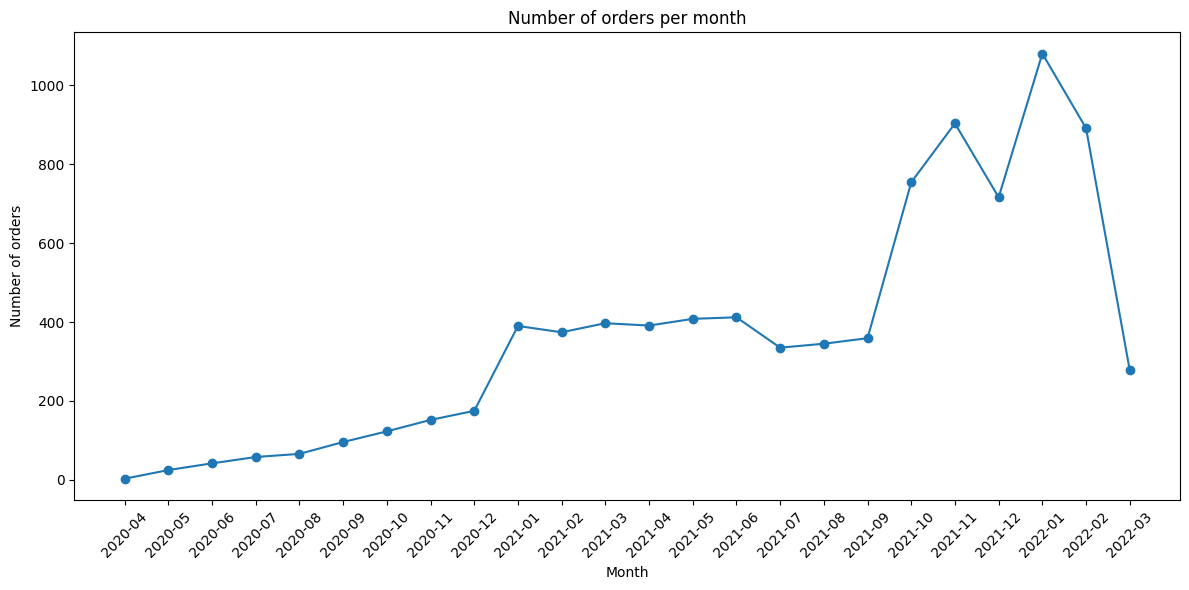

In [28]:
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders['order_date'], monthly_orders['num_orders'], marker='o')

# Añadir títulos y etiquetas
plt.xlabel('Month')
plt.ylabel('Number of orders')
plt.title('Number of orders per month')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Podriamos tener en cuenta el numero de pedidos por mes (por ejemplo, una subida x mes), para tener inventario suficiente esos meses. Tambien seria interesante saber qué productos se venden mas esos meses.

Tambien se puede observar que la empresa ha ido creciendo hasta enero de 2022, que ha sufrido una bajada. De marzo no se puede opinar porque no conocemos si marzo ha terminado o no aún.